# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sns


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = "9ba6485cc6bf07f6c2d39a770ae42183"

url = "https://api.openweathermap.org/data/2.5/weather?appid=" + api_key +"&units=imperial&q="

In [5]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed =[]

record = 1

print(f"Beginning data retrieval")
print(f"---------------------------------------------")

for city in cities:
    urlCity = url + city
    
    try:
        response = requests.get(urlCity).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing record {record}|{city_record}")
        print(f"{url}&q={city}")
        
        record += 1
        
        time.sleep(1.03)
    except:
        print("City not found. Skipping..")
    continue


Beginning data retrieval
---------------------------------------------
Processing record 1|Hobart
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=hobart
City not found. Skipping..
Processing record 2|Atuona
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=atuona
Processing record 3|Chekhov
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=chekhov
Processing record 4|Babaeski
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=babaeski
Processing record 5|Governador Valadares
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=governador valadares
Processing record 6|Ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=ushuaia
Processing record 7|

Processing record 56|Ribeira Grande
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=ribeira grande
Processing record 57|Qaqortoq
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=qaqortoq
Processing record 58|Barrow
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=barrow
Processing record 59|Quatre Cocos
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=quatre cocos
Processing record 60|Cayenne
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=cayenne
Processing record 61|Faanui
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=faanui
City not found. Skipping..
Processing record 62|Gladstone
https://api.openweathermap.org/data/2.5/weather?appid=9b

Processing record 112|Castro
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=castro
Processing record 113|Bambous Virieux
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=bambous virieux
Processing record 114|Eureka
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=eureka
Processing record 115|Takoradi
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=takoradi
Processing record 116|Ryotsu
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=ryotsu
Processing record 117|Itarema
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=itarema
Processing record 118|Uzyn
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&unit

Processing record 167|Matara
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=matara
Processing record 168|Teahupoo
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=teahupoo
Processing record 169|Honiara
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=honiara
Processing record 170|Gerash
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=gerash
Processing record 171|Ixtapa
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=ixtapa
Processing record 172|Charleville
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=charleville
Processing record 173|Caravelas
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=i

Processing record 221|Dali
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=dali
Processing record 222|The Valley
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=the valley
Processing record 223|Namibe
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=namibe
Processing record 224|Mae Sai
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=mae sai
Processing record 225|Airai
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=airai
Processing record 226|Nelson Bay
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=nelson bay
Processing record 227|Ovsyanka
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperi

Processing record 276|Yumen
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=yumen
Processing record 277|Auki
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=auki
Processing record 278|Port Hedland
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=port hedland
Processing record 279|Kangaatsiaq
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=kangaatsiaq
City not found. Skipping..
Processing record 280|Polur
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=polur
Processing record 281|Pacific Grove
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=pacific grove
Processing record 282|Khorixas
https://api.openweathermap.org/data/2.5/weather?appid=9b

Processing record 330|Tsogni
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=tsogni
Processing record 331|Sosnovo
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=sosnovo
Processing record 332|Atherton
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=atherton
Processing record 333|Cabo San Lucas
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=cabo san lucas
Processing record 334|Haimen
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=haimen
Processing record 335|Karpathos
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=karpathos
Processing record 336|Mehamn
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae4218

Processing record 386|Praya
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=praya
Processing record 387|Swan Hill
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=swan hill
Processing record 388|Isla Aguada
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=isla aguada
Processing record 389|Kushima
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=kushima
Processing record 390|Khandyga
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=khandyga
Processing record 391|Klaksvik
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=klaksvik
Processing record 392|Palmer
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&un

Processing record 441|Derzhavinsk
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=derzhavinsk
Processing record 442|Fenyi
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=fenyi
Processing record 443|Broken Hill
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=broken hill
Processing record 444|Port-Cartier
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=port-cartier
Processing record 445|Flin Flon
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=flin flon
Processing record 446|Jiaocheng
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=jiaocheng
Processing record 447|Lata
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d

Processing record 496|Tautira
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=tautira
Processing record 497|Shubarkuduk
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=shubarkuduk
Processing record 498|Cherkasskoye
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=cherkasskoye
Processing record 499|Santa Lucia
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=santa lucia
Processing record 500|Kurilsk
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=kurilsk
Processing record 501|Saint-Pierre
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=saint-pierre
Processing record 502|Cheney
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6b

Processing record 551|San Ramon
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=san ramon
Processing record 552|Robertsport
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=robertsport
Processing record 553|Zarand
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=zarand
Processing record 554|Athabasca
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=athabasca
Processing record 555|Niquelandia
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=niquelandia
Processing record 556|Grand Gaube
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6c2d39a770ae42183&units=imperial&q=&q=grand gaube
Processing record 557|Camacha
https://api.openweathermap.org/data/2.5/weather?appid=9ba6485cc6bf07f6

In [7]:
temp_df = pd.DataFrame({"City":city_name, "Cloudiness":cloudiness,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Wind Speed":wind_speed})
temp_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,20,AU,1553625255,66,-42.88,147.33,50.00,6.93
1,Atuona,0,PF,1553625553,100,-9.80,-139.03,81.48,13.67
2,Chekhov,75,RU,1553624031,84,55.14,37.45,35.60,11.18
3,Babaeski,44,TR,1553625556,48,41.43,27.09,55.20,6.96
4,Governador Valadares,20,BR,1553625334,53,-18.85,-41.95,86.97,5.73


In [9]:
temp_df.count()
temp_df.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

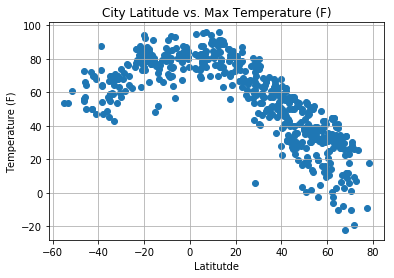

In [11]:


plt.scatter(temp_df["Lat"], temp_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Max_Temp.png")

# Show plot
plt.show()

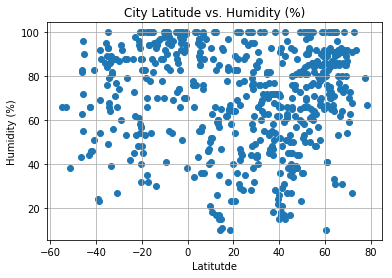

In [13]:
plt.scatter(temp_df["Lat"], temp_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

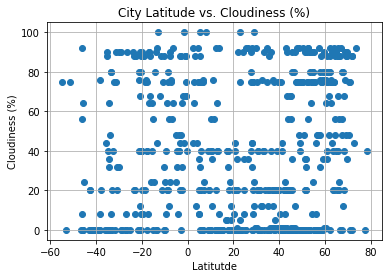

In [14]:


plt.scatter(temp_df["Lat"], temp_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

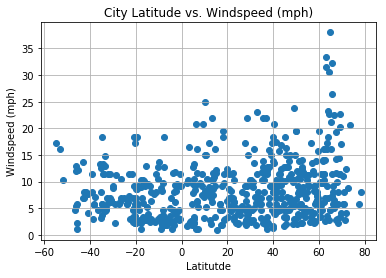

In [15]:

plt.scatter(temp_df["Lat"], temp_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (mph)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Windspeed.png")

# Show plot
plt.show()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

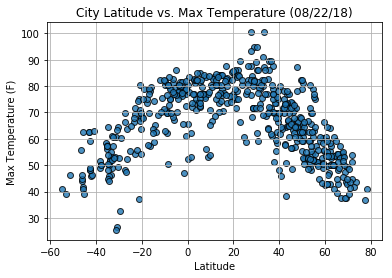

#### Latitude vs. Humidity Plot

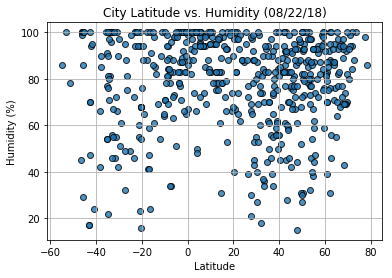

#### Latitude vs. Cloudiness Plot

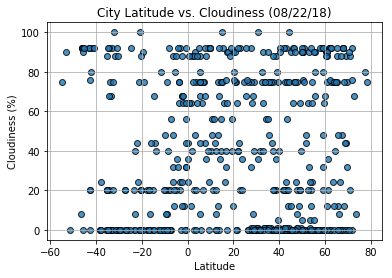

#### Latitude vs. Wind Speed Plot

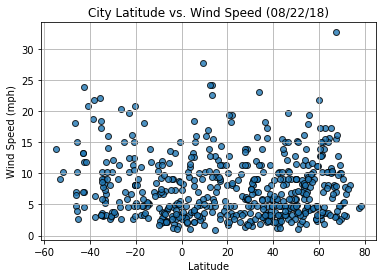